# Linear Wave 방정식

**강좌**: *기초 전산유체역학*

## 선형 파동 방정식
1차원 선형 파동 방정식은 다음과 같다.

$$
\frac{\partial u}{\partial t} + a \frac{\partial u}{\partial x} = 0.
$$

여기서 상수 $a$ 는 파의 전파속도이다. 다음 초기 조건에 의한 완전해는

$$
u(x,0) = F(x),~~~-\infty < x < \infty
$$

아래와 같다.

$$
u(x,t) = F(x-at).
$$

## 유한차분법
$n$ 번째 시간 $t^n$, $j$ 번째 격자점 $x_j$ 에서 근사해를 다음과 같이 표현하자.

$$
u_j^n = u(x_j, t^n).
$$

### First approach (Central difference)
시간에 대한 차분은 우선 Euler Explicit 방법을 생각하자.

$$
\frac{\partial u}{\partial t} \approx \frac{u_j^{n+1} - u_{j}^n}{\Delta t}.
$$

공간에 대한 차분은 중앙차분을 생각하자.

$$
a \frac{\partial u}{\partial x} \approx a \frac{u_{j+1}^n - u_{j-1}^n}{2 \Delta x}
$$

이를 정리하면 다음 기법을 만들 수 있다.

$$
u_j^{n+1} = u_{j}^n - \frac{a \Delta t}{2 \Delta x} (u_{j+1}^n - u_{j-1}^n).
$$

### Second approach (Upwind difference)
$a>0$ 인 경우 공간에 대한 차분을 1차 backward difference로 생각하자.

$$
a \frac{\partial u}{\partial x} \approx a \frac{u_{j}^n - u_{j-1}^n}{\Delta x}
$$

이를 정리하면 다음 기법을 만들 수 있다.

$$
u_j^{n+1} = u_{j}^n - \frac{a \Delta t}{\Delta x} (u_{j}^n - u_{j-1}^n).
$$

#### Sine wave 예제
계산 영역은 $x \in [-1, 1]$ 이고 초기 조건은 다음과 같다.

$$
u(x,0) = \sin(\pi x)
$$

양 끝점에서 경계 조건은 Periodic 조건을 주자. 수식적으로는

$$
u(-1, t) = u(1, t).
$$

시간 $t=1.5$ 일 때 해를 구하자.

#### 계산 격자 구성,  Solution array 구성
계산 영역을 $n_x + 1$개의 점으로 나누어보자.

즉 격자점은 다음과 같다.

$$
x_j = -1, -1 + \Delta x, -1 + 2 \Delta x, ..., 1 - \Delta x, 1 ~~(1 \le j \le n_x +1)
$$

:::{figure-md} Grid
<img src="figures/fd_pts.png">

Grid
:::

첫번째 격자점을 계산하기 위해서는 $x_0 = -1 - \Delta x$ 값이 필요하다. 
또한 마지막 격자점을 계산하기 위해서는 $x_{n_x+2} = 1 + \Delta x$ 값이 필요하다.

이를 대칭조건으로 구현하면 다음과 같다.

$$
u_0^n = u_{n_x}^n \\
u_{n_x+2}^n = u_2^n
$$

경계 조건을 위해서 Solution array는 격자점 + 2개의 경계 조건을 고려해서 $n_x+3$ 으로 구성한다.

시간 간격은 $\Delta t = 0.01$ 에 대해서 $n_x=50$ 인 경우 계산하면 다음과 같다.

In [1]:
%matplotlib inline
from matplotlib import pyplot as plt

import numpy as np

plt.style.use('ggplot')
plt.rcParams['figure.dpi'] = 150

In [2]:
def central(nx, u, dt, dx, a, du):
    for i in range(1, nx+2):
        du[i] = -0.5*a*(u[i+1] - u[i-1])/dx*dt

In [3]:
def central_v1(u, dt, dx, a):
    # Size of u : nx + 3
    # 0, nx+2 (or -1) - ghost cell, 
    # 1 - nx+1 (or -2) - Inner
    return -0.5*a*(u[2:] - u[:-2])/dx*dt

In [4]:
def bc_periodic(u):
    # index (nx : -3), (nx+2 : -1)
    u[0] = u[-3]
    u[-1] = u[2]

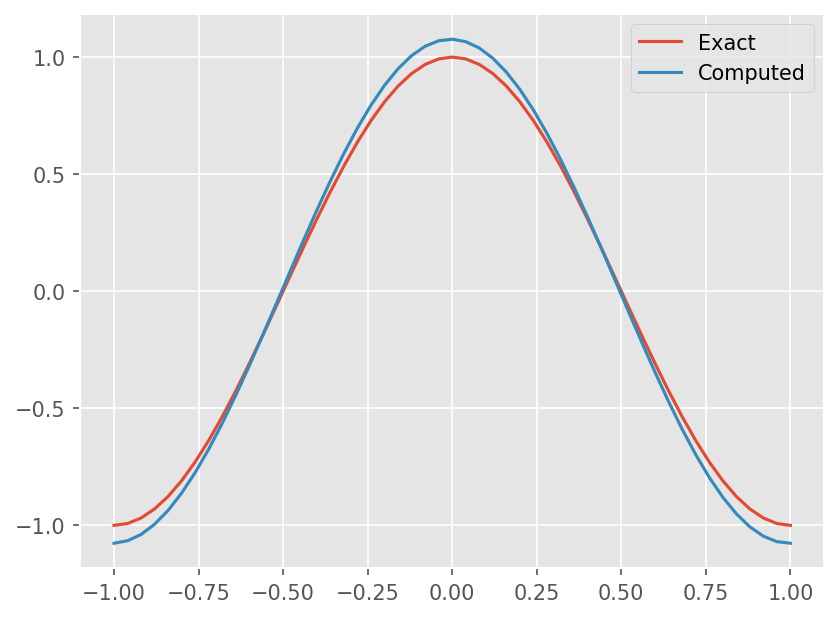

In [5]:
a = 1.0

nx = 50
dt = 0.01
t_target = 1.5

# Make grid
x = np.linspace(-1, 1, nx+1)
dx = np.diff(x)[0]

# Solution array
u = np.empty(nx+3)
du = np.zeros_like(u)

# Initialize
u[1:-1] = np.sin(np.pi*x)
bc_periodic(u)

# Calculation
t = 0
while abs(t - t_target) > 1e-8:
    # Adjust time step to reach target time
    dt = min(dt, t_target - t)
    
    # Periodic BC
    bc_periodic(u)
    
    # Scheme
    #du[1:-1] = central_v1(u, dt, dx, a)
    central(nx, u, dt, dx, a, du)
    
    # Update
    u += du
    t += dt
    
# Exact solution
u_exact = np.sin(np.pi*(x-a*t))
plt.plot(x, u_exact)
plt.plot(x, u[1:-1])
plt.legend(['Exact', 'Computed'])

## 실습
- Central 기법에 대해 격자 개수와 시간 간격을 아래와 같이 달리하면셔 결과를 비교하시오.
   * $N$ = 50, 100, 200
   * $\Delta t = 0.005, 0.01, 0.02, 0.05, 0.1$


- Upwind difference를 구현한 후, Sine Wave 문제를 해석하시오. Central 기법과 결과 차이를 비교하시오.


- 다음 Square Wave에 대해 Central difference 와 Upwind difference를 해석하시오.

$$
u(x,0) = \begin{cases}
    0, & \text{if } x < -0.25 \\
    1, & \text{if } -0.25 \leq x < 0.25 \\
    0, & \text{if } x x > 0.25
  \end{cases}
$$

- (Optional) $a < 0$ 일때 Upwind difference 기법은 공간에 대해 Forward 차분식을 적용해야 한다. $a=-1$인 경우에 대해 Upwind 기법을 구현하시오.